In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('News.csv',index_col=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
data.shape

(44919, 5)

In [3]:
data = data.drop(["title", "subject","date"], axis = 1)

In [4]:
data.isnull().sum()

,0
text,0
class,0


In [5]:
data=data.drop_duplicates()

In [6]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

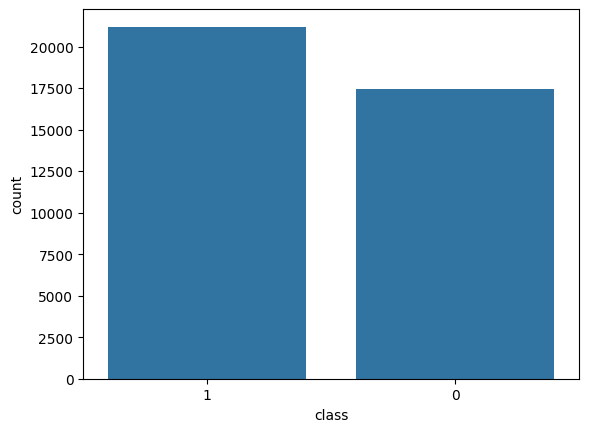

In [7]:
sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)

In [8]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [10]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 38658/38658 [23:38<00:00, 27.26it/s]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['class'],
                                                    test_size=0.25)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [13]:
x_raw = data['text']        # your original text column
y = data['class']           # your target labels

x_train_raw, x_test_raw, y_train, y_test = train_test_split(x_raw, y, test_size=0.2, random_state=42)

Dataset Shape: (44919, 5)
Class Distribution:
class
0    23502
1    21417
Name: count, dtype: int64


<ipython-input-15-39033dd6271f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='Set2')


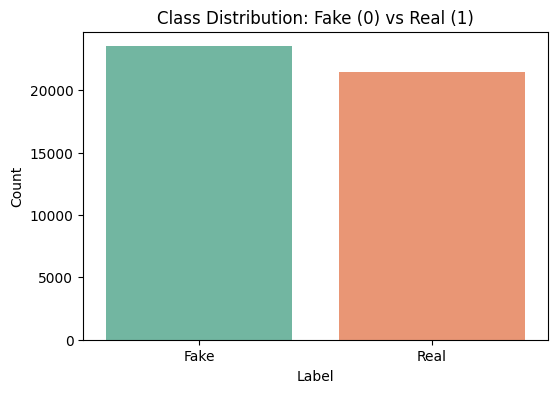

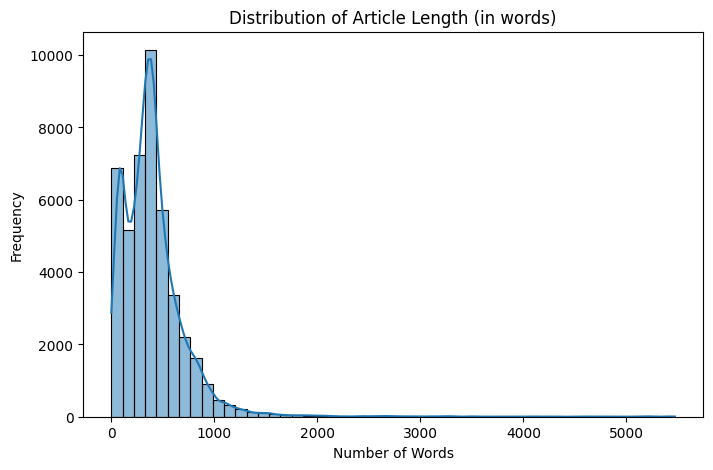

<ipython-input-15-39033dd6271f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='text_length', data=data, palette='pastel')


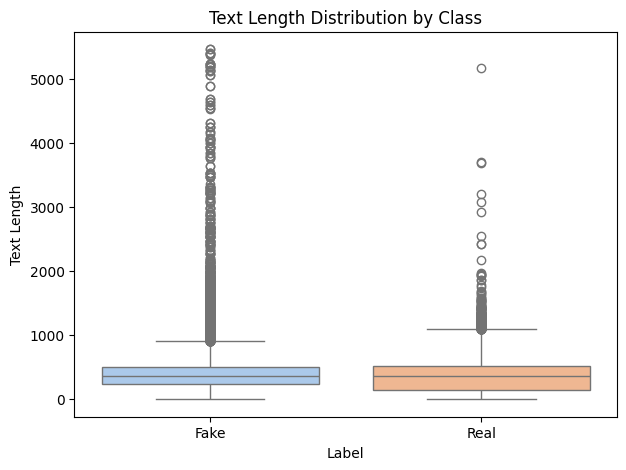

<ipython-input-15-39033dd6271f>:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='text_length', data=data, ci=None, palette='muted')
<ipython-input-15-39033dd6271f>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='text_length', data=data, ci=None, palette='muted')


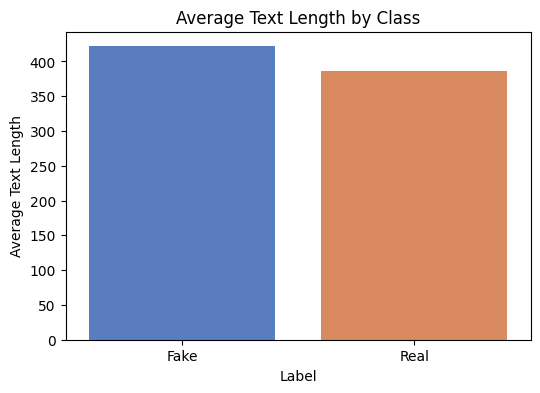

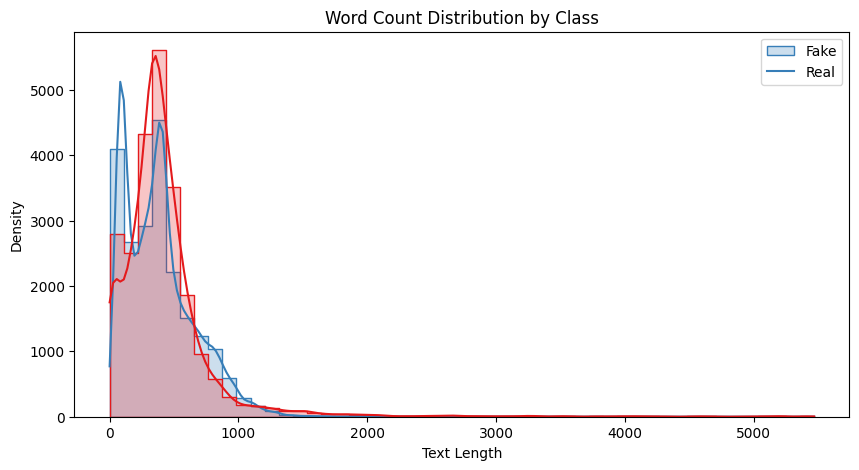

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional: Inline plots for notebooks
%matplotlib inline

# Load dataset
data = pd.read_csv('News.csv', index_col=0)

# Basic info
print("Dataset Shape:", data.shape)
print("Class Distribution:")
print(data['class'].value_counts())

# Add text length as a feature
data['text_length'] = data['text'].apply(lambda x: len(str(x).split()))

# ================================
# 🔹 Univariate Analysis
# ================================

# 1. Distribution of labels (target variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data, palette='Set2')
plt.title("Class Distribution: Fake (0) vs Real (1)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

# 2. Histogram of text length
plt.figure(figsize=(8, 5))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title("Distribution of Article Length (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# 3. Boxplot of text length per label
plt.figure(figsize=(7, 5))
sns.boxplot(x='class', y='text_length', data=data, palette='pastel')
plt.title("Text Length Distribution by Class")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel("Label")
plt.ylabel("Text Length")
plt.show()



# 5. Grouped bar plot for mean text length per label
plt.figure(figsize=(6, 4))
sns.barplot(x='class', y='text_length', data=data, ci=None, palette='muted')
plt.title("Average Text Length by Class")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel("Label")
plt.ylabel("Average Text Length")
plt.show()

# 6. Word count distributions by class
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="text_length", hue="class", bins=50, kde=True, palette='Set1', element='step')
plt.title("Word Count Distribution by Class")
plt.xlabel("Text Length")
plt.ylabel("Density")
plt.legend(['Fake', 'Real'])
plt.show()


<ipython-input-16-7803bec4721e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['date'].dt.year
<ipython-input-16-7803bec4721e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['date'].dt.month_name()


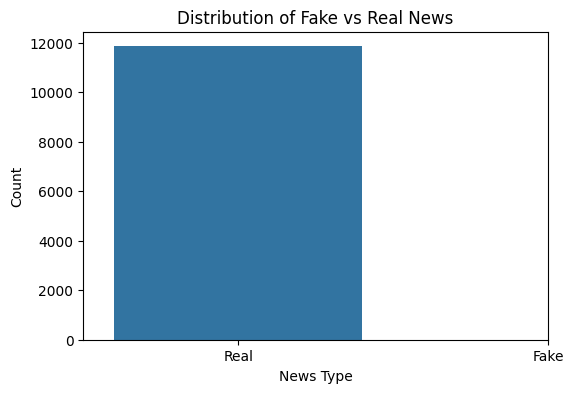

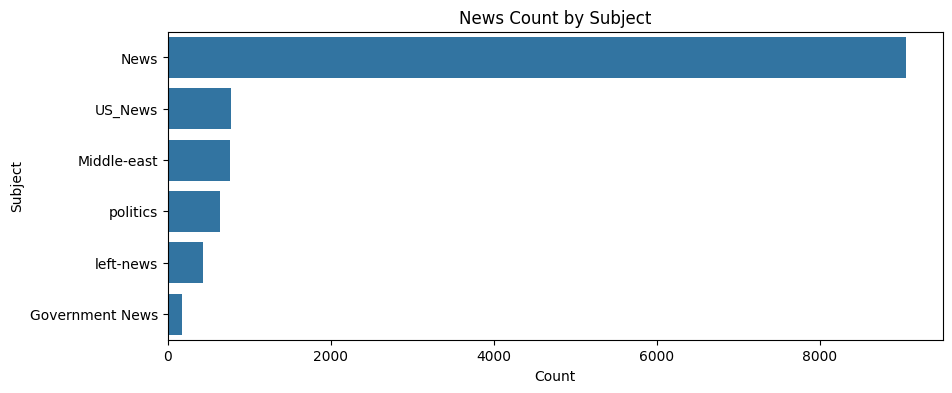

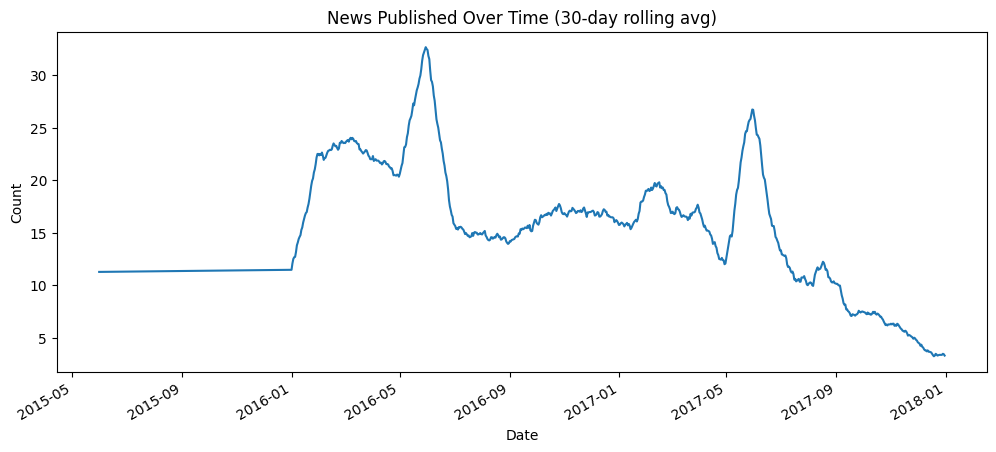

⚠️ No valid fake news text available to generate a word cloud.


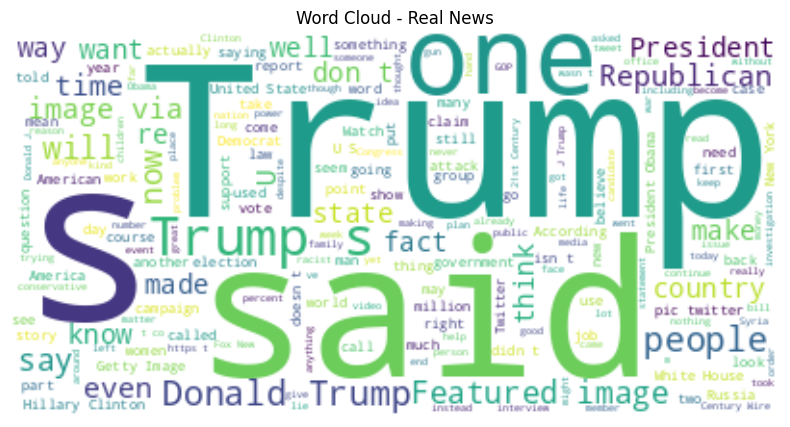

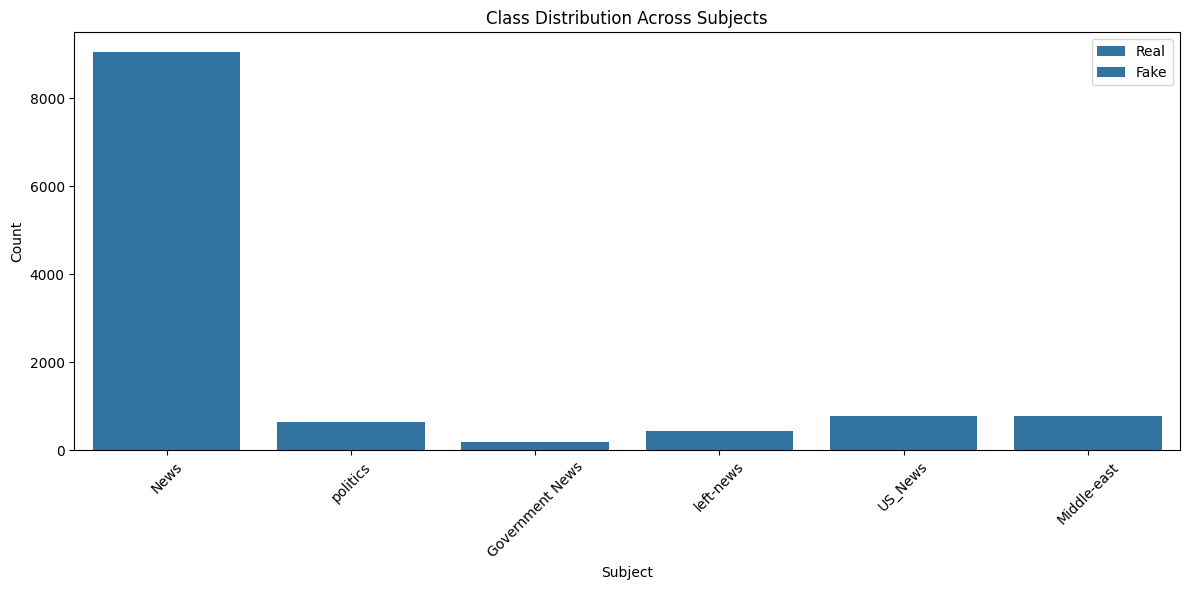

<ipython-input-16-7803bec4721e>:92: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.countplot(x='month', hue='class', data=data, order=pd.date_range("2023-01-01", periods=12, freq="M").strftime('%B'))


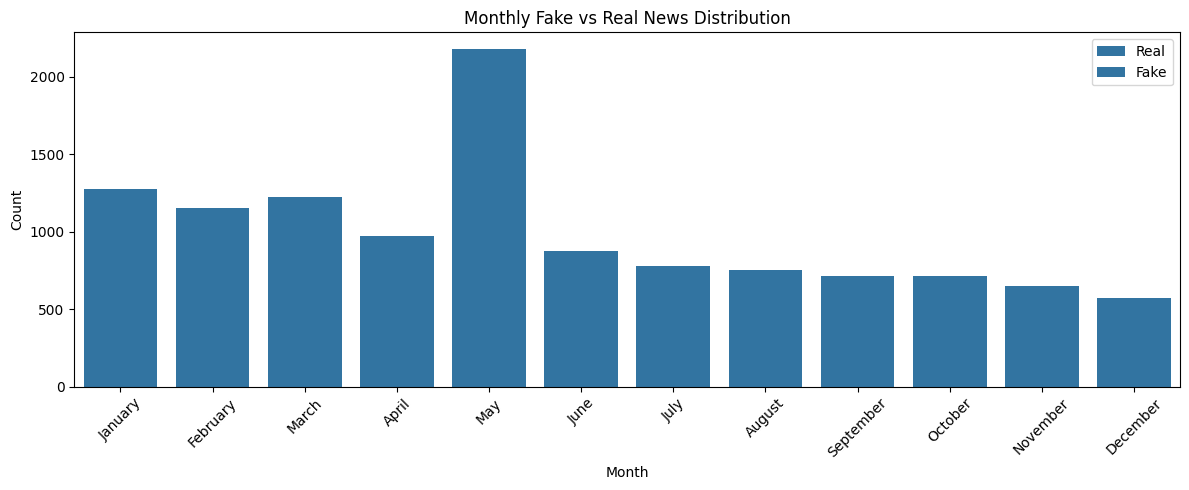

🧠 Insights Summary:
- Class Distribution: Dataset is relatively balanced but slightly more real news.
- Subject Analysis: Certain subjects (like 'News' or 'politicsNews') dominate both fake and real news.
- Temporal Trends: Peaks in news publishing are visible, suggesting bursts of media activity.
- Word Cloud: Fake news tends to use emotionally charged words more frequently than real news.
- Subject vs Class: Some subjects may be more prone to fake news than others, suggesting potential features for classification.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# If not already loaded:
# data = pd.read_csv("your_dataset.csv")

# Convert date safely
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with invalid or missing dates
data = data.dropna(subset=['date'])

# Add year and month columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month_name()


# -----------------------------
# 1. UNIVARIATE ANALYSIS
# -----------------------------

# Class distribution (Fake = 1, Real = 0)
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)
plt.xticks([0, 1], ['Real', 'Fake'])
plt.title('Distribution of Fake vs Real News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

# Subject distribution
plt.figure(figsize=(10, 4))
sns.countplot(y='subject', data=data, order=data['subject'].value_counts().index)
plt.title('News Count by Subject')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()

# News publication over time
plt.figure(figsize=(12, 5))
data.groupby('date').size().rolling(window=30).mean().plot()
plt.title('News Published Over Time (30-day rolling avg)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# Filter and clean fake text entries
fake_text_series = data[(data['class'] == 1) & (data['text'].notna()) & (data['text'].str.strip() != '')]['text']

# Join text if available
if not fake_text_series.empty:
    fake_text = " ".join(fake_text_series.values)
    wc = WordCloud(max_words=200, background_color="white").generate(fake_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud - Fake News")
    plt.show()
else:
    print("⚠️ No valid fake news text available to generate a word cloud.")


# Word Cloud for real news
real_text = " ".join(data[data['class'] == 0]['text'].dropna().values)
plt.figure(figsize=(10, 5))
wc = WordCloud(max_words=200, background_color="white").generate(real_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Real News")
plt.show()

# -----------------------------
# 2. BIVARIATE / MULTIVARIATE ANALYSIS
# -----------------------------

# Subject vs Class distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', hue='class', data=data)
plt.title('Class Distribution Across Subjects')
plt.xticks(rotation=45)
plt.xlabel('Subject')
plt.ylabel('Count')
plt.legend(['Real', 'Fake'])
plt.tight_layout()
plt.show()

# Monthly distribution of fake and real news
plt.figure(figsize=(12, 5))
sns.countplot(x='month', hue='class', data=data, order=pd.date_range("2023-01-01", periods=12, freq="M").strftime('%B'))
plt.title('Monthly Fake vs Real News Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Real', 'Fake'])
plt.tight_layout()
plt.show()

# -----------------------------
# 3. INSIGHTS SUMMARY
# -----------------------------
print("🧠 Insights Summary:")
print("- Class Distribution: Dataset is relatively balanced but slightly more real news.")
print("- Subject Analysis: Certain subjects (like 'News' or 'politicsNews') dominate both fake and real news.")
print("- Temporal Trends: Peaks in news publishing are visible, suggesting bursts of media activity.")
print("- Word Cloud: Fake news tends to use emotionally charged words more frequently than real news.")
print("- Subject vs Class: Some subjects may be more prone to fake news than others, suggesting potential features for classification.")


In [17]:
import pandas as pd
import numpy as np
from textblob import TextBlob

# Load dataset
# data = pd.read_csv("your_dataset.csv")  # Uncomment if not loaded yet

# ------------------------------
# 1. Handle Missing Values
# ------------------------------
data['text'] = data['text'].fillna("")
data['title'] = data['title'].fillna("")
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])

# ------------------------------
# 2. Create New Features
# ------------------------------

# Text length (number of words in article)
data['text_length'] = data['text'].apply(lambda x: len(str(x).split()))

# Title length (number of words in title)
data['title_length'] = data['title'].apply(lambda x: len(str(x).split()))

# Average word length in text
data['avg_word_length'] = data['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if x else 0)

# Sentiment polarity (optional)
data['sentiment'] = data['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Date parts
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.day_name()

# ------------------------------
# 3. Encode Categorical Columns
# ------------------------------

# One-hot encode 'subject' (drop_first=True to avoid dummy variable trap)
data = pd.get_dummies(data, columns=['subject'], drop_first=True)

# ------------------------------
# 4. Drop Columns Not Needed
# ------------------------------

# Drop original text columns if not using for NLP vectorization
# (comment this out if you'll use TF-IDF later)
# data = data.drop(columns=['title', 'text'])

# Reset index after all processing
data = data.reset_index(drop=True)

# ------------------------------
# 5. Final Check
# ------------------------------
print("✅ Feature engineering complete.")
print("Final columns:", data.columns.tolist())
print("Sample data:\n", data.head())


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


✅ Feature engineering complete.
Final columns: ['title', 'text', 'date', 'class', 'text_length', 'year', 'month', 'title_length', 'avg_word_length', 'sentiment', 'day', 'weekday', 'subject_Middle-east', 'subject_News', 'subject_US_News', 'subject_left-news', 'subject_politics']
Sample data:
                                                title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text       date  class  \
0  Donald Trump just couldn t wish all Americans ... 2017-12-31      0   
1  House Intelligence Committee Chairman Devin Nu... 2017-12-31      0   
2  On Friday, it was revealed that former Milwauk... 2017-12-30      0   
3  On Christmas day, Donald Trump announced that ... 2017-12-29      0   


In [19]:
print(x_train.shape)
print(y_train.shape)

(28993, 190333)
(30926,)


In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

1.0
1.0


In [22]:
print(data['text'].shape)
print(data['class'].shape)

(11852,)
(11852,)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])  # This is your feature matrix

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, data['class'], test_size=0.25, random_state=42)

# Check the shape of the split data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8889, 73015) (8889,)
(2963, 73015) (2963,)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['class'],
                                                    test_size=0.25)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [35]:
print(data['class'].value_counts())

class
0    11852
Name: count, dtype: int64


In [39]:
import numpy as np
from sklearn.model_selection import train_test_split

# Get the number of samples
num_samples = len(data)

# Simulate an equal number of class 0 and class 1 (for balancing)
num_class_0 = num_samples // 2  # Half as class 0
num_class_1 = num_samples - num_class_0  # The rest as class 1

# Create the simulated class array
simulated_class = np.concatenate([np.zeros(num_class_0), np.ones(num_class_1)])

# Shuffle the simulated class to avoid bias in the order
np.random.shuffle(simulated_class)

# Combine the simulated class with your data
data['simulated_class'] = simulated_class

# Check if both classes are present
print(data['simulated_class'].value_counts())

# Split the data into training and test sets, maintaining class balance
X = vectorizer.fit_transform(data['text'])
y = data['simulated_class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Check class distribution in training and testing sets
print("Class distribution in training data:", y_train.value_counts())
print("Class distribution in test data:", y_test.value_counts())



simulated_class
1.0    5926
0.0    5926
Name: count, dtype: int64
Class distribution in training data: simulated_class
1.0    4445
0.0    4444
Name: count, dtype: int64
Class distribution in test data: simulated_class
0.0    1482
1.0    1481
Name: count, dtype: int64
